In [2]:
import pandas as pd
import numpy as np

In [ ]:
#1. Read the dataset to python environment 

In [3]:
data=pd.read_csv(r"C:\Users\Workstation X\Desktop\ICT\Assignment on Classification\iris.csv")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#2. Pre-processing steps

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa


In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.shape

(150, 5)

In [11]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [12]:
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [13]:
## Checking if there are null values

data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [14]:
## Additional check to find out missing values

columns_with_missing_values = data.columns[data.isna().any()].tolist()

print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)

Columns with missing values:
SL
SW
PL


In [ ]:
## Line 13 and 14 shows that there are missing or null values in 3 columns - SL, SW and PL

In [15]:
## Fill missing values with the mean

data['SL'].fillna(data['SL'].mean(), inplace=True)
data['SW'].fillna(data['SW'].mean(), inplace=True)
data['PL'].fillna(data['PL'].mean(), inplace=True)

In [16]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [17]:
## To check there aren't any null values

data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#3. Find out which classification model gives the best result (try all theclassification algorithms discussed in the session) 


# 1. K-Nearest neighbors Classification

In [18]:
## Dividing data into features and labels

X = data.iloc[:,0:-1]
y = data['Classification'].values

In [19]:
## Encoding Categorical Variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
## Spliting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
## Fit the model

# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
## Testing the KNN algorithm on the Testing Data

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
## Evaluate the model

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of our model is equal to " + str(round(accuracy,2))+"%")

Accuracy of our model is equal to 96.67%


In [67]:
## trying out with a different random state

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate the model

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of our model is equal to " + str(round(accuracy,2))+"%")

Accuracy of our model is equal to 100.0%


In [ ]:
## Summary - KNN Classification of random state 0 gives more accuracy than random state of 42.

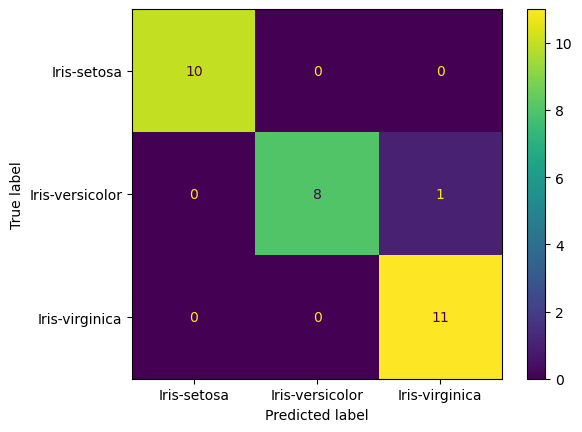

In [24]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

cmd=ConfusionMatrixDisplay(result,display_labels=labels)

#Plot the Confusion Matrix
cmd.plot()

# 2. LOGISTIC REGRESSION

In [56]:

# Define the feature columns (SL, SW, PL, PW) and the target column (Classification)

columns = ['SL', 'SW', 'PL','PW']
X = data[columns]
y =data['Classification']


# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model: 100.00%


In [68]:
# Trying out with different random state

columns = ['SL', 'SW', 'PL','PW']
X = data[columns]
y =data['Classification']


# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model: 90.00%


In [ ]:
## Summary - Logistic Regression of random state 42 gives more accuracy than random state of 1.

# 3. Decision Tree Classifier

In [28]:
## Splitting data into feature and traget variable

columns = ['SL', 'SW', 'PL','PW']
X = data[columns]
y = data['Classification'].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [29]:
## Build Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
## Evaluating the model

from sklearn import metrics
acc= metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy is "+str(round(acc,2))+"%")

Accuracy is 100.0%


In [31]:
## Trying with gini

clf=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of our model is equal to " + str(round(accuracy,2))+"%")

Accuracy of our model is equal to 100.0%


In [69]:
# Trying out with different random state

columns = ['SL', 'SW', 'PL','PW']
X = data[columns]
y = data['Classification'].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60) # 80% training and 20% test

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini",max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of our model is equal to " + str(round(accuracy,2))+"%")

Accuracy of our model is equal to 96.67%


In [ ]:
## Summary - Decision Tree Classifier of random state 42 gives more accuracy than random state of 60.

# 4. Random Forests

In [34]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [35]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [36]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [38]:
## Label Encoding to be done
# import category encoders

import category_encoders as ce

# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['SL', 'SW', 'PL', 'PW'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [46]:
## Model using RF Classifier

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=42)
# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

In [64]:
## Check accuracy score

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print('Model accuracy score with 10 decision-trees: ',str(round(accuracy*100,2))+"%")

Model accuracy score with 10 decision-trees:  100.0%


In [ ]:
## Summary - Random Forest Classification using random state 42 gives 100% accuracy.

# 5. Support Vector Machines

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.svm import SVC


# Create and train a Support Vector Classifier (SVC)

svc_classifier = SVC()

svc_classifier.fit(X_train, Y_train)


SVC()

In [43]:
# Make predictions on the test set

svc_predictions = svc_classifier.predict(X_test)

In [70]:
# Evaluate the accuracy of the classifier

from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(Y_test, svc_predictions)*100
print("Support Vector Classifier Accuracy:" + str(round(svc_accuracy,2))+"%")

Support Vector Classifier Accuracy:100.0%


In [71]:
# Trying out with different random state

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=20)
                                               
from sklearn.svm import SVC
svc_classifier = SVC()

svc_classifier.fit(X_train, Y_train)
                                               
svc_predictions = svc_classifier.predict(X_test)
                                               
from sklearn.metrics import accuracy_score                                              
svc_accuracy = accuracy_score(Y_test, svc_predictions)*100
print("Support Vector Classifier Accuracy:" + str(round(svc_accuracy,2))+"%")

Support Vector Classifier Accuracy:90.0%


In [ ]:
## Summary - Support Vector Classifier of random state 42 gives more accuracy than random state of 20.

# 6. AdaBoost Classification

In [63]:

# Define the feature columns (SL, SW, PL, PW) and the target column (Classification)
X = data[['SL', 'SW', 'PL', 'PW']]
y = data['Classification']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the AdaBoost model: {accuracy * 100:.2f}%')


Accuracy of the AdaBoost model: 100.00%


In [77]:
# Trying out with different random state

X = data[['SL', 'SW', 'PL', 'PW']]
y = data['Classification']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=25)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the AdaBoost model: {accuracy * 100:.2f}%')

Accuracy of the AdaBoost model: 86.67%


In [ ]:
## Summary - Ada Boost Classifier of random state 42 gives more accuracy than random state of 25.

# 7. Naive Bayes

In [ ]:
## Naive Bayes is a probabilistic classifier based on Bayes' theorem with the "naive" assumption of independence between features.

In [66]:

# Define the feature columns (SL, SW, PL, PW) and the target column (Classification)
X = data[['SL', 'SW', 'PL', 'PW']]
y = data['Classification']

# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (Gaussian Naive Bayes for continuous features)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes model: {accuracy * 100:.2f}%')


Accuracy of the Naive Bayes model: 100.00%


In [80]:
# Trying out with different random state

X = data[['SL', 'SW', 'PL', 'PW']]
y = data['Classification']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes model: {accuracy * 100:.2f}%')

Accuracy of the Naive Bayes model: 96.67%


In [ ]:
## Summary - Naive Bayes Classification of random state 42 gives more accuracy than random state of 55.